# 1. Load the Covertype Data Set

In [ ]:
import pandas as pd
df  = pd.read_csv('covtype.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


We are missing column names, let's add them

In [ ]:
col_names = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fine_Points']

# Binary feature column names
wilderness_area = ['Wilderness_Area' + str(i) for i in range(1,5)]
soil_type = ['Soil_Type'+str(i) for i in range(1,41)]

# concat column names
col_names += wilderness_area + soil_type + ['Cover_Type']

In [ ]:
df.columns=col_names
df.head().transpose()

,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
Horizontal_Distance_To_Fine_Points,6279,6225,6121,6211,6172


# Implement a very simple heuristic that will classify the data

> It dosn't need to be accurate

To implement a simple heuristic, we can OneR classifier, which is a decision tree with a single split.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Creating training and test set.


X = df.drop('Cover_Type',axis=1)
y = df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.15)

In [ ]:
# Creating the decisiton tree
tree = DecisionTreeClassifier(max_depth =1)

>We will create split on Elevation (first column) we could search for a better split but it's not needed right now.

In [ ]:
tree.fit(X_train[['Elevation']],y_train)

y_pred = tree.predict(X_test[['Elevation']])

OneR_acc = accuracy_score(y_test,y_pred)
OneR_acc

0.6341908389939416

# Use Scikit-learn library to train two simple Machine Learning models

>Choose models that will be useful as a baseline

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(50,min_samples_leaf=5,max_features=0.5,n_jobs=-1)
rf.fit(X_train,y_train)
rf_acc = accuracy_score(y_test,rf.predict(X_test));rf_acc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test,knn.predict(X_test))
knn_acc

In [ ]:
from joblib import dump
models = [knn,rf,tree]

[dump(model,f"{model}.joblib") for model in models]

[['KNeighborsClassifier(n_jobs=-1, n_neighbors=7).joblib'],
 ['RandomForestClassifier(max_features=0.5, min_samples_leaf=5, n_estimators=50,\n                       n_jobs=-1).joblib'],
 ['DecisionTreeClassifier(max_depth=1).joblib']]

# Use TensorFlow library to train a neural network that will classify the data
> Create a function that will find a good set of hyperparameters for the NN \
> Plot training curves for the best hyperparameters

In [ ]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def create_nn(n_layers = 2,n_neurons=64,lr=0.1,n_out=7):
    model = Sequential()
    # Input layer
    model.add(Dense(n_neurons,activation='relu',input_dim=X_train.shape[1]))
    
    # Hidden Layers
    for _ in range(n_layers-1):
        model.add(Dense(n_neurons,activation='relu'))
    
    # Output layer
    model.add(Dense(n_out,activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

2023-04-12 10:57:16.103724: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-12 10:57:16.561872: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-12 10:57:16.564698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 10:57:18.493828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
y_test -=1
y_train -=1
# Defining parameter grid
params_grid = {
    'n_layers': [1, 2, 3],
    'n_neurons': [32, 64, 128],
    'lr': [0.001, 0.01, 0.1]
}
# Performing a grid search
#model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_nn,epochs=5,batch_size=32,verbose=0)
#grid_search = GridSearchCV(estimator=model,param_grid=params_grid,cv=3,n_jobs=-1)
#grid_result = grid_search.fit(X_train,y_train)

In [ ]:
#Creating validation dataset
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train, test_size = 0.2)

model = create_nn(lr = 0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose=1)

Epoch 1/10
9878/9878 [==============================] - 26s 3ms/step - loss: 2.9232 - accuracy: 0.5750 - val_loss: 1.0035 - val_accuracy: 0.6792
Epoch 2/10
9878/9878 [==============================] - 26s 3ms/step - loss: 0.8528 - accuracy: 0.6626 - val_loss: 0.7193 - val_accuracy: 0.6969
Epoch 3/10
9878/9878 [==============================] - 26s 3ms/step - loss: 0.6886 - accuracy: 0.7042 - val_loss: 0.6634 - val_accuracy: 0.7171
Epoch 4/10
9878/9878 [==============================] - 26s 3ms/step - loss: 0.6540 - accuracy: 0.7188 - val_loss: 0.6764 - val_accuracy: 0.7171
Epoch 5/10
9878/9878 [==============================] - 26s 3ms/step - loss: 0.6338 - accuracy: 0.7276 - val_loss: 0.6301 - val_accuracy: 0.7272
Epoch 6/10
9878/9878 [==============================] - 26s 3ms/step - loss: 0.6228 - accuracy: 0.7320 - val_loss: 0.6292 - val_accuracy: 0.7311
Epoch 7/10
9878/9878 [==============================] - 26s 3ms/step - loss: 0.6132 - accuracy: 0.7362 - val_loss: 0.6140 - val_ac

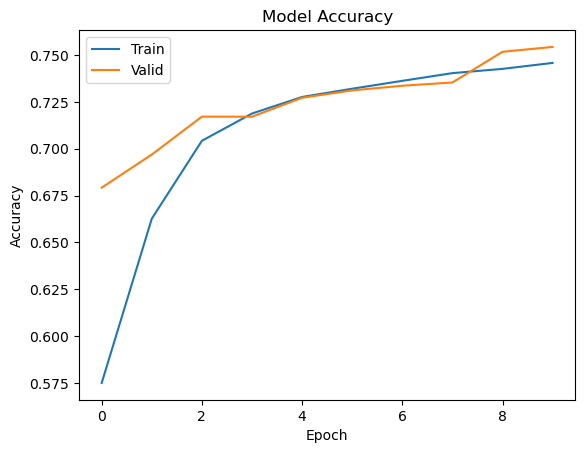

Text(0.5, 1.0, 'Model Loss')

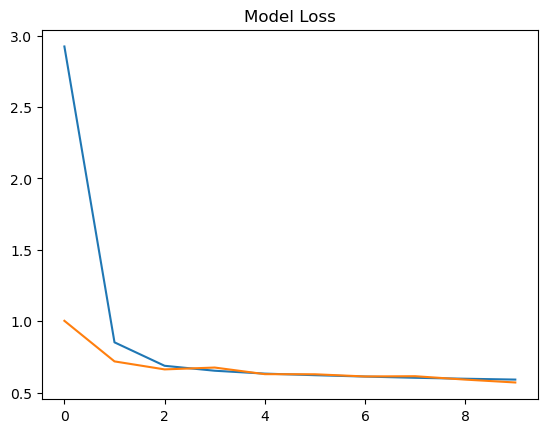

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')